# Granger Causality test

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd

In [6]:
# DataFrame
tesla_tw = pd.read_csv('Tesla_tweet_stock.csv')
tesla_tw.drop('Unnamed: 0', inplace=True, axis=1)
tesla_tw.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107512,0.219178,5.086,up


In [15]:
# DataFrame
tesla_tw_outl = pd.read_csv('Tesla_tweets_stock_outlier.csv')
tesla_tw_outl.drop('Unnamed: 0', inplace=True, axis=1)
tesla_tw_outl.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection,std_chang,std_polar
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down,-0.048129,-0.033924
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down,-0.271125,0.394838
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up,1.592089,0.269389
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down,-0.400149,-0.556091
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107512,0.219178,5.086,up,0.658923,0.760368


In [27]:
tesla_tw_outl['dum']=pd.get_dummies(tesla_tw_outl['diection'], drop_first=True)

In [32]:
tesla_tw_outl

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection,std_chang,std_polar,dum
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down,-0.048129,-0.033924,0
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down,-0.271125,0.394838,0
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up,1.592089,0.269389,1
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down,-0.400149,-0.556091,0
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107512,0.219178,5.086,up,0.658923,0.760368,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2022-11-08,194.020,191.300,0.075518,0.308039,0.046128,0.872000,0.081850,0.087291,-2.720,down,-0.180378,-0.355238,0
135,2022-11-09,190.775,177.590,0.060422,0.224464,0.050599,0.878974,0.070418,0.056075,-13.185,down,-1.305575,-0.743621,0
136,2022-11-10,189.900,190.720,0.102952,0.280519,0.043643,0.883635,0.072722,0.108611,0.820,up,0.200243,0.350604,1
137,2022-11-11,186.000,195.970,0.080823,0.277186,0.040436,0.891332,0.068228,0.106121,9.970,up,1.184051,-0.218736,1


In [35]:
tesla_tw_outl.dropna(inplace=True)
tesla_tw_outl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          138 non-null    object 
 1   open          138 non-null    float64
 2   close         138 non-null    float64
 3   polarity      138 non-null    float64
 4   subjectivity  138 non-null    float64
 5   neg           138 non-null    float64
 6   neu           138 non-null    float64
 7   pos           138 non-null    float64
 8   compound      138 non-null    float64
 9   change        138 non-null    float64
 10  diection      138 non-null    object 
 11  std_chang     138 non-null    float64
 12  std_polar     138 non-null    float64
 13  dum           138 non-null    uint8  
dtypes: float64(11), object(2), uint8(1)
memory usage: 15.2+ KB


In [40]:
tesla_tw_outl['dum']= [-1 if change == 0 else change for change in tesla_tw_outl['dum']]
tesla_tw_outl.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection,std_chang,std_polar,dum
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down,-0.048129,-0.033924,-1
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down,-0.271125,0.394838,-1
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up,1.592089,0.269389,1
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down,-0.400149,-0.556091,-1
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107512,0.219178,5.086,up,0.658923,0.760368,1


In [61]:
# data variable to input into granger
data = tesla_tw_outl[["dum", "compound"]].pct_change().dropna()

In [62]:
gc_test = sm.tsa.stattools.grangercausalitytests(data, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0938  , p=0.1503  , df_denom=133, df_num=1
ssr based chi2 test:   chi2=2.1410  , p=0.1434  , df=1
likelihood ratio test: chi2=2.1244  , p=0.1450  , df=1
parameter F test:         F=2.0938  , p=0.1503  , df_denom=133, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8444  , p=0.1622  , df_denom=130, df_num=2
ssr based chi2 test:   chi2=3.8306  , p=0.1473  , df=2
likelihood ratio test: chi2=3.7773  , p=0.1513  , df=2
parameter F test:         F=1.8444  , p=0.1622  , df_denom=130, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2802  , p=0.2841  , df_denom=127, df_num=3
ssr based chi2 test:   chi2=4.0522  , p=0.2559  , df=3
likelihood ratio test: chi2=3.9922  , p=0.2623  , df=3
parameter F test:         F=1.2802  , p=0.2841  , df_denom=127, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1277  , p=0.0813  

**There is Granger causality between stock change (up or down) and compound value of tweets with 4 days lag**

# DataFrame with lag 4

# Decision tree

### Loading libraries 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [72]:
X = tesla_tw_outl[['compound']]
y= tesla_tw_outl[['diection']]

In [75]:
X.head()

,compound
0,0.206849
1,0.185046
2,0.139801
3,0.094391
4,0.219178


In [78]:
y.head()

,diection
0,down
1,down
2,up
3,down
4,up


In [73]:
X_train.shape

(96,)

,Error_metric,Train,Test
0,Accuracy,0.697917,0.642857
1,Precision,0.781250,0.800000
2,Recall,0.531915,0.380952


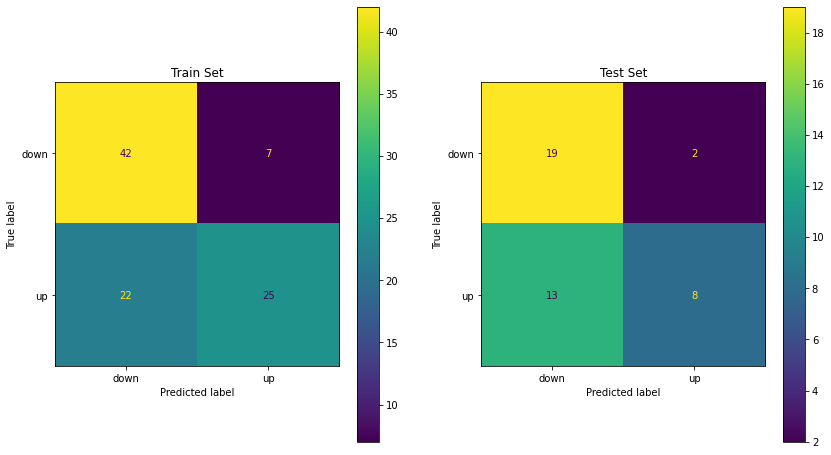

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label="up"),
                                         recall_score(y_train, y_pred_train_dt,pos_label="up")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label="up"),
                                        recall_score(y_test, y_pred_test_dt,pos_label="up")]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")